## ВШЭ, ФКН, Программа "Специалист по Data Science" (2021/2022)
## Курс "Машинное обучение"
## ДЗ №4:  Решающие деревья и ансамбли
## Выполнил: Кирилл Н., ibnkir@yandex.ru, 15.02.2022 г.
***

## О задании

Часть 1 содержит теоретические задачи на решающие деревья.

Часть 2 содержит практическое задание на реализацию разбиения вершины в решающем дереве.

Часть 3 содержит практическое задание на применение ансамблей в машинном обучении.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.



## Оценивание и штрафы


#### Theory  [4 балла]
* [Задание 1](#task1) [1 балл]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]
* [Задание 4](#task4) [1 балл]

#### Решающие деревья [7 баллов]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [1 балл]
* [Задание 3](#task2_3) [1 балл]
* [Задание 4](#task2_4) [2 балла]
* [Задание 5](#task2_5) [1 балл]
* [Задание 6](#task2_6) [1 балл]

#### Ансамбли  [7 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [2 балла]
* [Задание 5](#task3_5) [1 балл]
* [Задание 6](#task3_6) [1 балл]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{18},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

# Часть 1. Теоретические вопросы

### Задание 1 [1 балл] <a id="task1"></a>

В листе дерева оказываются 10 объектов, 8 из которых из одного класса, а 2 - из второго. Посчитайте (двоичную - с логарифмом по основанию 2) энтропию получившейся выборки в листе. Ответ округлите до двух знаков после запятой.

**Ответ:** Энтропия $H=-\sum_{i=1}^2 p_i\log_2{p_i} \approx 0.50$ (см. расчет ниже).

In [19]:
import math
p = [8/10, 2/10]
H = -sum(map(lambda x: x*math.log(x), p))
print('{:.2f}'.format(H))

0.50


### Задание 2 [1 балл] <a id="task2"></a>

Для приведенной ниже таблицы посчитайте, сколько нужно перебрать предикатов вида $[x_j = a]$ ([признак = какое-то значение]), чтобы построить первый узел решающего дерева.

| $x_1$ | $x_2$ | $x_3$ | $y$ |
|------|------|------|------|
| A1 | A2 | A3 | A|
| B1 | A2 | A3 | A|
| C1 | B2 | A3 | B|
| A1 | C2 | B3 | A|
| B1 | D2 | A3 | B|
| B1 | C2 | B3 | B|
| C1 | D2 | B3 | A|

**Ответ:** Жадный алгоритм построения дерева должен будет перебрать все возможные предикаты, 
проверяя при этом все уникальные значения у каждого признака. Поскольку признак $x_1$ имеет 3 уникальных значения,
$x_2$ - 4, а $х_3$ - 2, то общее количество предикатов будет равно $(3+4+2) = 9$.

### Задание 3 [1 балл] <a id="task3"></a>

Используя приведенную таблицу, по какому признаку следует формировать первый узел решающего дерева, если мы хотим предсказать $y$? В качестве критерия информативности использовать энтропию, в качестве критериев разделения - индикаторы $[x_j = a]$.

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $y$ |
|------|------|------|------|------|
| A1 | A2 | A3 | A4 | A |
| B1 | A2 | B3 | A4 | A |
| C1 | C2 | A3 | A4 | A |
| A1 | A2 | D3 | B4 | A |
| C1 | B2 | C3 | A4 | B |
| B1 | C2 | D3 | B4 | A |
| A1 | B2 | B3 | A4 | A |
| C1 | C2 | C3 | B4 | B |
| B1 | B2 | C3 | B4 | B |
| A1 | C2 | C3 | A4 | B |

__Подсказка.__ *Внимательно посмотрите на данные.*

**Ответ:** Первый узел дерева необходимо формировать по критерию $[x_3=a]$, т.к. при таком разбиении
получается минимальное значение критерия ошибки $Q(R,j,t):$
$$Q(R,3,a) = \frac{|R_l|}{|R|}H(R_l)+\frac{|R_r|}{|R|}H(R_r)\approx 0.0$$ 
(см. расчеты ниже). 

Кроме того, это можно определить непосредственно из условия, т.к. каждому уникальному значению
признака $x_3$ соответствуют выходные значения `y` одного и того же класса.

In [4]:
import math

p1_A = [3/4,1/4]
H1_A = -sum(map(lambda x: x*math.log(x), p1_A))
p1_B = [2/3,1/3]
H1_B = -sum(map(lambda x: x*math.log(x), p1_B))
p1_C = [1/3,2/3]
H1_C = -sum(map(lambda x: x*math.log(x), p1_C))
Q1 = 4/10*H1_A + 3/10*H1_B + 3/10*H1_C
print('Q1 = {:.4f}'.format(Q1))

p2_A = [3/3]
H2_A = -sum(map(lambda x: x*math.log(x), p2_A))
p2_B = [1/3,2/3]
H2_B = -sum(map(lambda x: x*math.log(x), p2_B))
p2_C = [2/4,2/4]
H2_C = -sum(map(lambda x: x*math.log(x), p2_C))
Q2 = 3/10*H2_A + 3/10*H2_B + 4/10*H2_C
print('Q2 = {:.4f}'.format(Q2))

p3_A = [2/2]
H3_A = -sum(map(lambda x: x*math.log(x), p3_A))
p3_B = [2/2]
H3_B = -sum(map(lambda x: x*math.log(x), p3_B))
p3_C = [4/4]
H3_C = -sum(map(lambda x: x*math.log(x), p3_C))
p3_D = [2/2]
H3_D = -sum(map(lambda x: x*math.log(x), p3_D))
Q3 = 2/10*H3_A + 2/10*H3_B + 4/10*H3_C + 2/10*H3_D
print('Q3 = {:.4f}'.format(Q3))

p4_A = [4/6,2/6]
H4_A = -sum(map(lambda x: x*math.log(x), p4_A))
p4_B = [2/4,2/4]
H4_B = -sum(map(lambda x: x*math.log(x), p4_B))
Q4 = 6/10*H4_A + 4/10*H4_B
print('Q4 = {:.4f}'.format(Q4))

Q1 = 0.6068
Q2 = 0.4682
Q3 = -0.0000
Q4 = 0.6592


### Задание 4 [1 балл] <a id="task4"></a>

Из перечисленных наборов объектов разных классов выберите набор с **наименьшей** энтропией.

    1) 30 объектов класса 0, 10 объектов класса 1
    2) 20 объектов класса 0, 10 объектов класса 1, 10 объектов класса 2
    3) 35 объектов класса 0, 5 объектов класса 1, 5 объектов класса 2
    4) 20 объектов класса 0, 20 объектов класса 1

**Ответ:** Наименьшей энтропией обладает 1-й набор: 
$H_1=-\sum_{i=1}^{K_1} p_{1i}\log_2{p_{1i}} \approx 0.5623$ (см. расчеты ниже).

In [7]:
import math

p1 = [30/40,10/40]
H1 = -sum(map(lambda x: x*math.log(x), p1))
print('H1 = {:.4f}'.format(H1))

p2 = [20/40,10/40,10/40]
H2 = -sum(map(lambda x: x*math.log(x), p2))
print('H2 = {:.4f}'.format(H2))

p3 = [35/45,5/45,5/45]
H3 = -sum(map(lambda x: x*math.log(x), p3))
print('H3 = {:.4f}'.format(H3))

p4 = [20/40,20/40]
H4 = -sum(map(lambda x: x*math.log(x), p4))
print('H4 = {:.4f}'.format(H4))

H1 = 0.5623
H2 = 1.0397
H3 = 0.6837
H4 = 0.6931


# Часть 2. Практика - решающие деревья

В этой части вам предстоит реализовать первое разбиение в решающем дереве своими руками.

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [115]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Импортируем данные.

In [116]:
boston = load_boston()

Описание данных:

In [117]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Данные представлены в виде словаря, у которого есть следующие ключи:

In [118]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Представим данные в виде `pandas.DataFrame`, также добавим в них целевую переменную.

In [119]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X['target'] = boston['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Распределение целевой переменной:

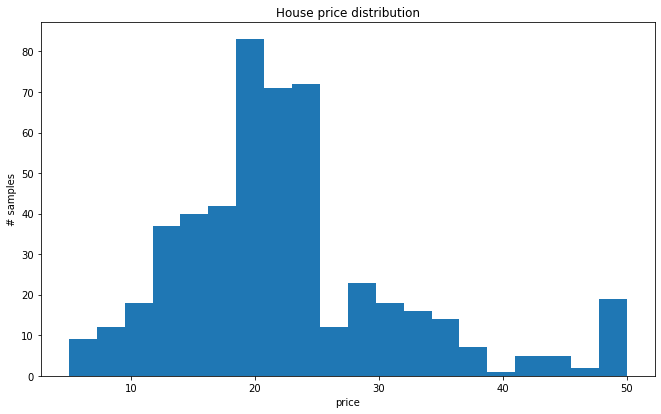

In [120]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(X['target'], bins=20)
plt.show()

Напомним, как ищется разбиение в конкретной вершине. Пусть мы выбрали какой-то признак и порог. Обозначим $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки выглядит следующим образом:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t},
$$

где $R_\ell$ - множество объектов в левой вершине (поддереве), $R_r$ - множество объектов в правой вершине (поддереве), $|R|$ - число объектов в множестве $R$, а $H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$. Например, в случае классификации $H(R)$ может быть выражено энтропией, а в случае регрессии - дисперсией.

Мы хотим минимизировать $Q(R_m, j, t)$ по $j$ и $t$ - то есть подобрать такие $j$ и $t$, что для них значение $Q(R_m, j, t)$ будет минимальным.

### Задание 1 [1 балл] <a id="task2_1"></a>

Реализуйте функцию подсчета критерия информативности. В данном случае мы решаем задачу регрессии, так что используйте дисперсию значений целевой переменной (колонка 'target').

Сделайте так, чтобы даже для пустой таблицы (в которой нет ни одного объекта) выдавался численный ответ - 0, а не NaN. Возможно, в этом вам поможет функция `np.nan_to_num`.

In [121]:
def H(R):
    """
    INPUT
    R - pd.DataFrame - характеризует собой набор объектов в вершине. В нашем случае R - это будет подмножество объектов из
    изначальной таблицы X
    
    OUTPUT
    H(R) - значение критерия информативности (дисперсия значений целевой переменной объектов в вершине)
    """
    # YOUR CODE HERE
    l = len(R) 
    if l==0 or l==1:
        H = 0
    else:
        H = R['target'].fillna(0).var()
    
    return H

In [122]:
# Test the function
assert np.allclose(H(X), 84.5867235940986)
assert np.allclose(H(pd.DataFrame(columns=X.columns)), 0.0)
assert np.allclose(H(pd.DataFrame({'id': [0,1], 'target': [np.nan,np.nan]}).set_index('id')), 0.0)

### Задание 2 [1 балл]<a id="task2_2"></a>

Реализуйте функцию, которая разобьет объекты в данной вершине на две группы по заданному признаку `feature` и порогу `t`. Пусть в левую вершину попадут объекты, у которых значение `feature <= t`, а в правую - у которых значение `feature > t`.

In [123]:
def split_node(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    R_l - pd.DataFrame - объекты, которые попали в левую вершину
    R_r - pd.DataFrame - объекты, которые попали в правую вершину
    """
    R_l = R_m[R_m[feature]<=t] # YOUR CODE HERE
    R_r = R_m[R_m[feature]>t] # YOUR CODE HERE
    
    return R_l, R_r

In [124]:
# Test the function
R_l, R_r = split_node(X, 'ZN', 6.0)
assert np.allclose(H(R_l), 73.7555971219894)
assert np.allclose(H(R_r), 70.64116541353386)
assert R_l['ZN'].max() <= 6.0
assert R_r['ZN'].min() > 6.0

### Задание 3 [1 балл]<a id="task2_3"></a>

Реализуйте функцию, подсчитывающую значение критерия ошибки. Разделите данные по заданным признаку и порогу, посчитайте значения критериев информативности в полученных вершинах и получите результат по формуле в начале задания.

In [125]:
import math

def q_error(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    Q - float - значение критерия ошибки
    """
    # YOUR CODE HERE
    l = len(R_m)
    if l==0 or l==1:
        Q = 0
    else:
        R_l, R_r = split_node(R_m, feature, t)
        Q = (len(R_l)*H(R_l) + len(R_r)*H(R_r)) / l
    
    return Q

In [126]:
assert np.allclose(q_error(X, 'ZN', 6.0), 72.93082666955256)
assert np.allclose(q_error(pd.DataFrame(columns=X.columns),'INDUS',3.0), 0.0)
assert np.allclose(q_error(pd.DataFrame({'id': [0,1], 'feature': [np.nan,np.nan]}).set_index('id'),'feature',0.0), 0.0)

### Задание 4 [2 балла]<a id="task2_4"></a>

Теперь, когда основные функции реализованы, можно перейти к непосредственному поиску оптимальных признака и порога. Для начала реализуйте функцию, с помощью которой можно найти оптимальный порог для разбиения вершины с помощью заданного признака. В качестве пороговых значений можно перебрать все уникальные значения признака, посчитать для каждого значение критерия ошибки, а затем выбрать пороговое значение, соответствующее наименьшему значению критерия ошибки.

In [127]:
def get_optimal_t(R_m, feature):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    
    OUTPUT
    t_opt - float - оптимальное значение порога (для которого значение критерия ошибки минимально)
    t_array - list - список перебираемых пороговых значений
    Q_array - list - список значений критерия ошибки, соответствующих перебранным пороговым значениям (для построения графика)
    """
    # YOUR CODE HERE 
    if len(R_m) == 0:
        return 0, [], []
    
    t_array = list(set(R_m[feature]))
    Q_dict = {}
    for t in t_array:
        Q_dict[t] = q_error(R_m, feature, t)
    t_opt = min(Q_dict, key=Q_dict.get)
    Q_array = Q_dict.values()
    
    return t_opt, t_array, Q_array

In [128]:
# Test function
t_opt, t_array, Q_array = get_optimal_t(X, 'CRIM')
assert np.allclose(t_opt, 6.65492)

t_opt, t_array, Q_array = get_optimal_t(pd.DataFrame(columns=X.columns), 'CRIM')
assert np.allclose(t_opt, 0)

Выведите график зависимости значения критерия ошибки (`Q`) от порогового значения (`t`) при разбиении вершины по признаку `CRIM`.

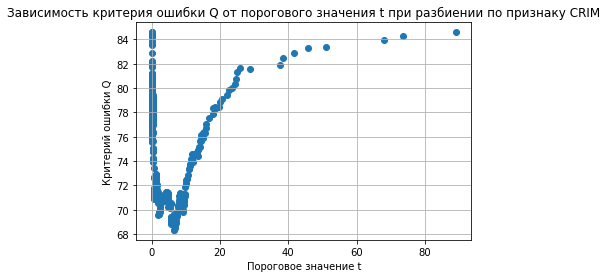

In [129]:
# your code here
t_opt, t_array, Q_array = get_optimal_t(X, 'CRIM')

fig, ax = plt.subplots(ncols=1, figsize=(6,4)) 
plt.scatter(t_array, Q_array)
ax.set_xlabel('Пороговое значение t')
ax.set_ylabel('Критерий ошибки Q')
plt.title("Зависимость критерия ошибки Q от порогового значения t при разбиении по признаку CRIM")
plt.grid()
plt.show()

### Задание 5 [1 балл]<a id="task2_5"></a>

Теперь реализуйте функцию, с помощью которой можно определить также оптимальный признак. Внутри функции пройдитесь циклом по всем признакам, для каждого вызовите `get_optimal_t`, найдите оптимальный порог и минимальное значение критерия ошибки. Сравните полученные результаты (признаки, пороги и значения критерия ошибки для них) и выберите признак с порогом, соответствующие наименьшему значению критерия ошибки.

**ИСКЛЮЧИТЕ ИЗ РАССМОТРЕНИЯ КОЛОНКУ 'target', ЭТО НЕ ПРИЗНАК!**

In [130]:
def get_optimal_split(R_m):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    
    OUTPUT
    feature_opt - оптимальное значение признака для разбиения вершины
    t_opt - оптимальное значение порога для разбиения вершины
    """
    # YOUR CODE HERE
    t_dict = {}
    Q_dict = {}
    for feature in R_m.columns:
        if feature=='target':
            continue
        t_opt, t_array, Q_array = get_optimal_t(R_m, feature)
        t_dict[feature] = t_opt
        Q_dict[feature] = min(Q_array)
        
    feature_opt = min(Q_dict, key=Q_dict.get)
    t_opt = t_dict[feature_opt]
    
    return feature_opt, t_opt

In [131]:
# Test the function
feature_opt, t_opt = get_optimal_split(X)
print('Optimal feature:', feature_opt)
print('Optimal t:', t_opt)
assert feature_opt == 'RM'
assert np.allclose(t_opt, 6.939)

Optimal feature: RM
Optimal t: 6.939


### Задание 6 [1 балл]<a id="task2_6"></a>

Изобразите на графике диаграмму рассеяния для объектов выборки со значением оптимального признака на одной оси и целевой переменной на другой. Нарисуйте линию, показывающую оптимальное разбиение по порогу (функция `plt.axvline`).

Как вы можете интерпретировать то, что полученное разбиение - лучшее?

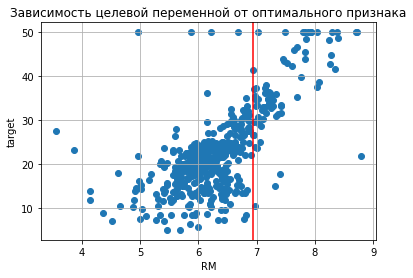

In [132]:
# your code here
fig, ax = plt.subplots(ncols=1, figsize=(6,4)) 
plt.scatter(X[feature_opt], X['target'])
ax.set_xlabel('RM')
ax.set_ylabel('target')
plt.title("Зависимость целевой переменной от оптимального признака")
plt.axvline(t_opt, color='red')
plt.grid()
plt.show()

<span style="color:blue">
Полученный предикат должен разбивать исходное множество объектов таким образом, чтобы минимизировать 
средневзвешенную дисперсию в каждом из подмножеств (а значит и их сумму). 
Из приведенного графика видно, что точки справа и слева от красной вертикальной прямой 
действительно располагаются более менее плотно друг к другу, подтверждая оптимальность найденного разбиения. 
</span>

# Часть 3. Практика - ансамбли

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data).

In [134]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [135]:
data = pd.read_csv('diabetes.csv')

In [136]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [137]:
data.shape

(768, 9)

Распределение целевой переменной:

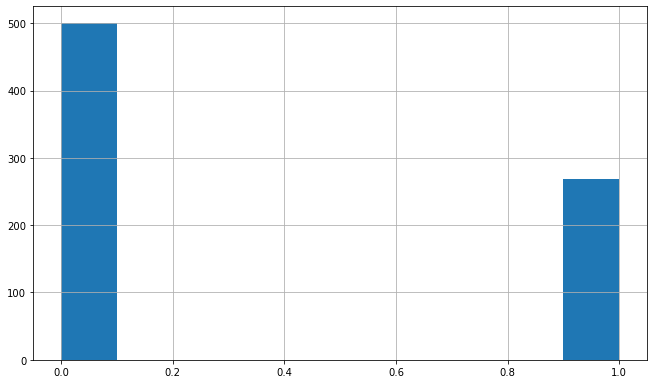

In [138]:
data['Outcome'].hist()
plt.show()

### Задание 1 [1 балл]<a id="task3_1"></a>

Разбейте выборку на обучающую и тестовую части в отношении 70:30. Не забудьте отделить целевую переменную от признаков (чтобы случайно не включить ее в обучение как признак).

In [139]:
# your code here
X_train, X_test, y_train, y_test = \
    train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.3, random_state=13)
X_train.shape, X_test.shape

((537, 8), (231, 8))

### Задание 2 [1 балл]<a id="task3_2"></a>

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на деревьях (параметр `base_estimator=DecisionTreeClassifier()`). Оцените качество классификации на тестовой выборке по метрикам accuracy, precision и recall.

In [140]:
# your code here
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=50,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [141]:
print('Mean accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {:.4f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, y_pred)))

Mean accuracy score: 0.7619
Precision score: 0.7500
Recall score: 0.5517


### Задание 3 [1 балл]<a id="task3_3"></a>

Теперь обучите Random Forest с числом деревьев, равным 50. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [142]:
# your code here
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [143]:
print('Mean accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision score: {:.4f}'.format(precision_score(y_test, y_pred_rf)))
print('Recall score: {:.4f}'.format(recall_score(y_test, y_pred_rf)))

Mean accuracy score: 0.7792
Precision score: 0.7903
Recall score: 0.5632


<span style="color:blue">
Качество случайного леса с тем же количеством деревьев оказалось лучше бэггинга по всем метрикам 
за счет большего разнообразия деревьев.
</span>

### Задание 4 [2 балл]<a id="task3_4"></a>

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

In [144]:
# Изменяем параметр n_estimators
params_n = {'n_estimators': np.arange(10,1500,160)}
rnd_clf = RandomForestClassifier(random_state=42)
gs1 = GridSearchCV(estimator=rnd_clf, param_grid=params_n, scoring='roc_auc', cv=5, n_jobs=-1)

In [145]:
%%time
gs1.fit(X_train, y_train);

Wall time: 16 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': array([  10,  170,  330,  490,  650,  810,  970, 1130, 1290, 1450])},
             scoring='roc_auc')

In [146]:
# Изменяем параметр min_samples_leaf
params_leaf = {'min_samples_leaf': np.arange(10,20,2)}
gs2 = GridSearchCV(estimator=rnd_clf, param_grid=params_leaf, scoring='roc_auc', cv=5, n_jobs=-1)

In [147]:
%%time
gs2.fit(X_train, y_train);

Wall time: 1.08 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': array([10, 12, 14, 16, 18])},
             scoring='roc_auc')

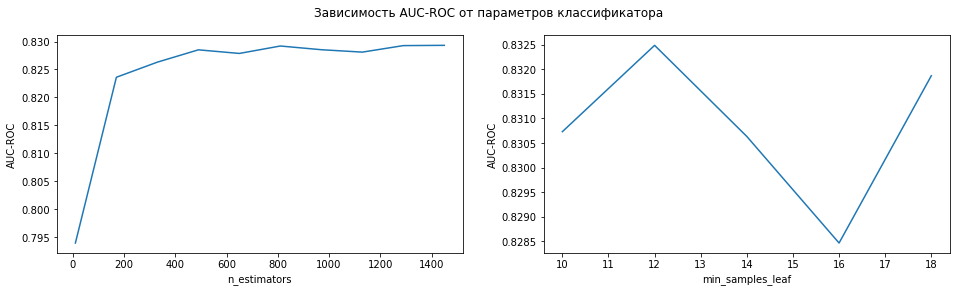

In [148]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4)) 

plt.suptitle('Зависимость AUC-ROC от параметров классификатора')

ax1.set_xlabel('n_estimators')
ax1.set_ylabel('AUC-ROC')
ax1.plot(params_n['n_estimators'], gs1.cv_results_['mean_test_score'])

ax2.set_xlabel('min_samples_leaf')
ax2.set_ylabel('AUC-ROC')
ax2.plot(params_leaf['min_samples_leaf'], gs2.cv_results_['mean_test_score'])

plt.show()

<span style="color:blue">

- С ростом числа деревьев точность случайного леса сначала быстро увеличивается, но потом практически не меняется.
Т.е. благодаря случайному выбору признаков данный алгоритм не переобучается с увеличением числа деревьев.

- Между минимальным кол-вом элементов в листьях и точностью нет такой же монотонной зависимости. 
При увеличении параметра min_samples_leaf довольно быстро достигается максимум, после чего точность сначала падает, 
а потом снова какое-то время растет. Это может быть связано с тем, что чем ветвистее дерево 
(т.е. чем меньше у него элементов в листьях), тем оно может быть точнее, но при этом и более склонным к переобучению. 
</span>

### Задание 5 [1 балл]<a id="task3_5"></a>

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot с помощью функции [`plt.bar`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.bar.html). Какой признак оказался самым важным для определения диабета?

In [149]:
# Изменяем оба параметра
params = {'n_estimators': np.arange(10,1500,160), 'min_samples_leaf': np.arange(10,20,2)}
gs3 = GridSearchCV(estimator=rnd_clf, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)

In [150]:
%%time
gs3.fit(X_train, y_train);

Wall time: 1min 20s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': array([10, 12, 14, 16, 18]),
                         'n_estimators': array([  10,  170,  330,  490,  650,  810,  970, 1130, 1290, 1450])},
             scoring='roc_auc')

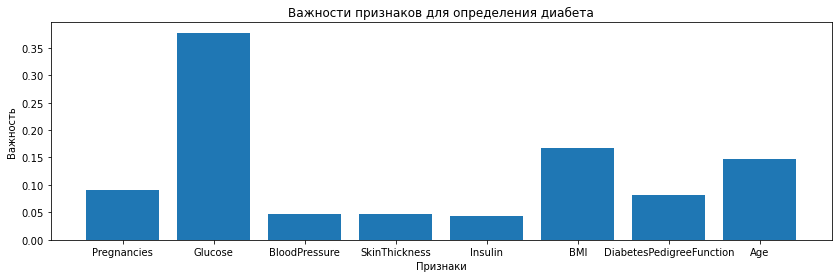

In [151]:
importances = gs3.best_estimator_.feature_importances_

fig, ax = plt.subplots(figsize=(14,4))
plt.bar(data.drop('Outcome', axis=1).columns, importances)

plt.title("Важности признаков для определения диабета", loc = 'center')
plt.xlabel('Признаки')
plt.ylabel('Важность')

plt.show()

In [152]:
max_imp = importances.max()
max_imp_idx = importances.argmax()
most_imp_feature = data.drop('Outcome', axis=1).columns[max_imp_idx]

print(f"Самый важный признак: {most_imp_feature}, важность: {max_imp:.4f}")

Самый важный признак: Glucose, важность: 0.3774


### Задание 6 [1 балл]<a id="task3_6"></a>

По аналогии со случайным лесом, переберите различные значения числа деревьев для [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) и постройте график зависимости AUC-ROC от числа деревьев. Что вы наблюдаете? Отличается ли этот график от аналогичного графика для случайного леса?

In [153]:
# your code here
params_n = {'n_estimators': np.arange(10,1500,160)}
gb_clf = GradientBoostingClassifier(learning_rate=0.2, random_state=241)
gs = GridSearchCV(estimator=gb_clf, param_grid=params_n, scoring='roc_auc', cv=5, n_jobs=-1)

In [154]:
%%time
gs.fit(X_train, y_train);

Wall time: 7.46 s


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  random_state=241),
             n_jobs=-1,
             param_grid={'n_estimators': array([  10,  170,  330,  490,  650,  810,  970, 1130, 1290, 1450])},
             scoring='roc_auc')

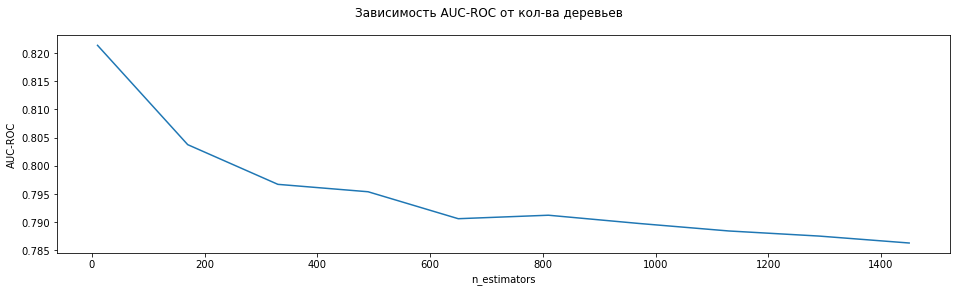

In [155]:
fig, ax = plt.subplots(ncols=1, figsize=(16,4)) 

plt.suptitle('Зависимость AUC-ROC от кол-ва деревьев')

ax.set_xlabel('n_estimators')
ax.set_ylabel('AUC-ROC')
ax.plot(params_n['n_estimators'], gs.cv_results_['mean_test_score'])

plt.show()

<span style="color:blue">
В отличие от случайного леса точность градиентного бустинга снижается при большом количестве деревьев,
т.к. из-за учета предыдущих ошибок на одной и той же обучающей выборке возникает переобучение. 
</span>